In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_digits  

In [19]:
df = load_digits()


In [18]:
dir(df)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [9]:
df.data[5]

array([ 0.,  0., 12., 10.,  0.,  0.,  0.,  0.,  0.,  0., 14., 16., 16.,
       14.,  0.,  0.,  0.,  0., 13., 16., 15., 10.,  1.,  0.,  0.,  0.,
       11., 16., 16.,  7.,  0.,  0.,  0.,  0.,  0.,  4.,  7., 16.,  7.,
        0.,  0.,  0.,  0.,  0.,  4., 16.,  9.,  0.,  0.,  0.,  5.,  4.,
       12., 16.,  4.,  0.,  0.,  0.,  9., 16., 16., 10.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

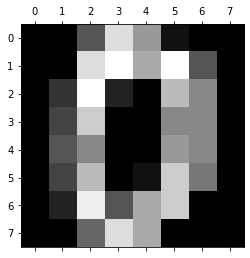

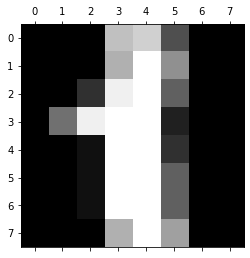

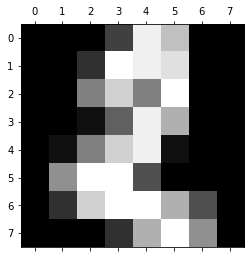

In [14]:
plt.gray()
for i in range(3):
    plt.matshow(df.images[i])

In [16]:
df.target[0:5]

array([0, 1, 2, 3, 4])

In [20]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(df.data, df.target,test_size=0.8)

In [23]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()

In [26]:
reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
reg.score(x_test,y_test)

0.9450625869262865

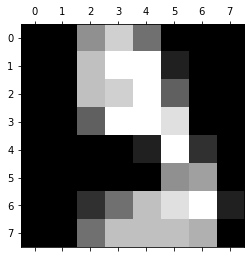

In [33]:
plt.matshow(df.images[29])

In [34]:
reg.predict([df.data[29]])

array([9])

## Confusion Matrix

In [35]:
from sklearn.metrics import confusion_matrix

In [37]:
y_predicted = reg.predict(x_test)

In [42]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[137,   0,   0,   0,   1,   0,   3,   0,   0,   0],
       [  0, 142,   0,   0,   0,   0,   0,   0,   3,   1],
       [  0,   4, 132,   0,   0,   0,   0,   2,   6,   0],
       [  0,   0,   1, 139,   0,   0,   0,   0,   3,   1],
       [  0,   1,   0,   0, 134,   0,   3,   1,   2,   2],
       [  1,   3,   0,   2,   0, 133,   1,   0,   0,   3],
       [  1,   1,   0,   0,   1,   0, 144,   0,   0,   0],
       [  0,   1,   0,   0,   1,   0,   0, 135,   1,   1],
       [  0,   9,   3,   1,   0,   2,   0,   0, 124,   2],
       [  1,   2,   0,   1,   1,   3,   0,   0,   3, 139]], dtype=int64)

Text(69.0, 0.5, 'Truth')

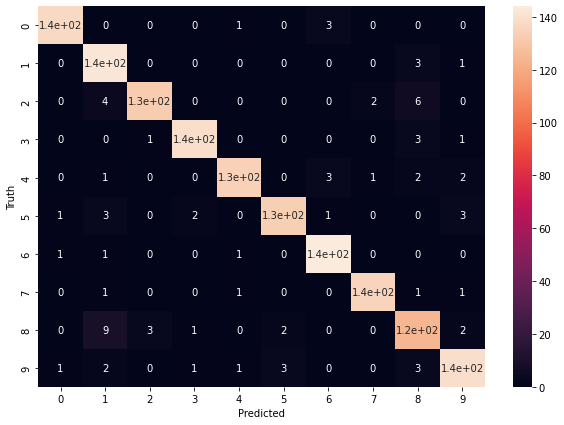

In [43]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')